this notebook is pretty much the same as v1 but I'm reducing the number of observations in the positive class

In [1]:
#imports
from fastai.vision.all  import *
from pathlib import Path
import pandas as pd

# data

In [2]:
!ls ../../../data/kickoffs

kickoff_returns_v1		kickoff_returns_v2_frame_sub60
kickoff_returns_v2_frame_sub10	kickoff_returns_v2_frame_sub70
kickoff_returns_v2_frame_sub20	kickoff_returns_v2_frame_sub80
kickoff_returns_v2_frame_sub30	kickoff_returns_v2_frame_sub90
kickoff_returns_v2_frame_sub40	plays.csv
kickoff_returns_v2_frame_sub50	v1


In [3]:
# import cv2
# im = cv2.imread('kickoffs/v1/2018090900_1992.png')
# print('width: ', im.shape[1])
# print('height:', im.shape[0])

In [4]:
data_path = '../../../data/kickoffs/'
plays = pd.read_csv(data_path + 'plays.csv'); plays.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,"J.Elliott kicks 65 yards from PHI 35 to end zone, Touchback.",1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Center-R.Lovato. J.Hardy to ATL 41 for 5 yards (K.Grugier-Hill). PENALTY on PHI-S.Gibson, Unsportsmanlike Conduct, 15 yards, enforced at ATL 41.",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18


In [5]:
df = plays.query('specialTeamsPlayType == "Kickoff" & specialTeamsResult == "Return"')[['gameId', 'playId', 'playResult', 'playDescription']]
df['fname'] = df.apply(lambda row: str(row.gameId) + '_' + str(row.playId) + '.png', axis=1)
df['label'] = df.apply(lambda row: 1 if int(row.playResult) < 30 else 0 , axis=1)
df.head(3)

,gameId,playId,playResult,playDescription,fname,label
3,2018090600,677,34,"M.Bosher kicks 64 yards from ATL 35 to PHI 1. S.Gibson to PHI 31 for 30 yards (D.Kazee, D.Riley).",2018090600_677.png,0
9,2018090600,1606,60,"M.Bosher kicks 68 yards from ATL 35 to PHI -3. S.Gibson to PHI 10 for 13 yards (K.Ishmael). PENALTY on PHI-A.Maddox, Offensive Holding, 5 yards, enforced at PHI 10.",2018090600_1606.png,0
24,2018090900,36,45,"S.Hauschka kicks 69 yards from BUF 35 to BAL -4. J.Grant to BAL 20 for 24 yards (L.Pitts). Penalty on BAL-J.Allen, Unnecessary Roughness, offsetting, enforced at BAL 20. Penalty on BUF-L.Pitts, Face Mask (15 Yards), offsetting.",2018090900_36.png,0


In [6]:
df = df[~df["playDescription"].str.contains('onside')]

In [7]:
df2 = df[['fname', 'label']]; df2.head(3)

,fname,label
3,2018090600_677.png,0
9,2018090600_1606.png,0
24,2018090900_36.png,0


In [8]:
sum(df2['label'])

270

In [9]:
len(df2)

2782

In [10]:
p = Path(data_path)
dls_sub10 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub10'), bs=32)
dls_sub20 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub20'), bs=32)
dls_sub30 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub30'), bs=32)
dls_sub40 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub40'), bs=32)
dls_sub50 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub50'), bs=32)
dls_sub60 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub60'), bs=32)
dls_sub70 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub70'), bs=32)
dls_sub80 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub80'), bs=32)
dls_sub90 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub90'), bs=32)

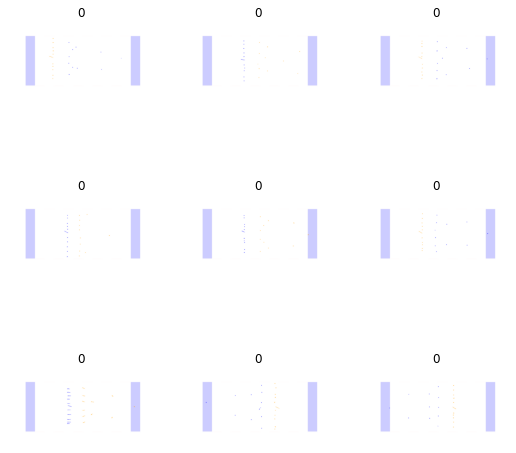

In [11]:
dls_sub10.show_batch()

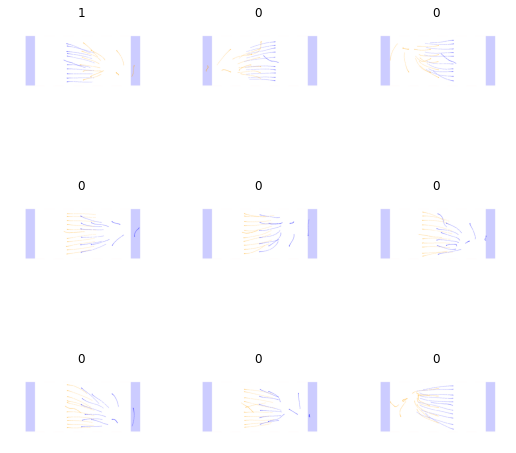

In [12]:
dls_sub50.show_batch()

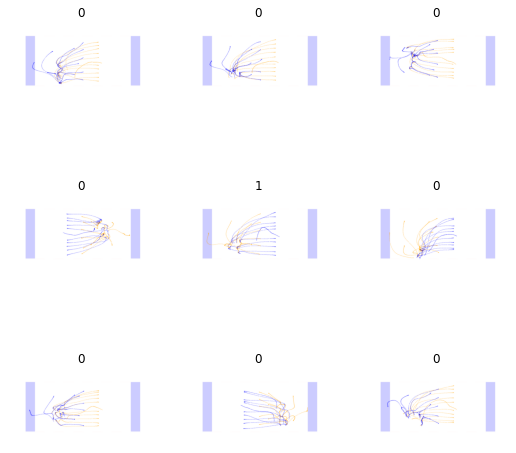

In [13]:
dls_sub90.show_batch()

# modeling - 10 frames

SuggestedLRs(valley=0.0014454397605732083)

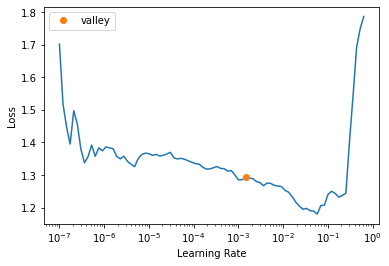

In [20]:
recall = Recall()
learn = cnn_learner(dls_sub10, resnet34, metrics=recall); learn.lr_find()

In [30]:
learn.fine_tune(8, 0.0014454397605732083)

epoch,train_loss,valid_loss,recall_score,time
0,1.035832,0.611721,0.192308,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.643497,1.070312,0.557692,00:57
1,0.569923,1.399861,0.000000,00:57
2,0.495693,2.642255,0.923077,00:57
3,0.457823,0.408155,0.000000,00:57
4,0.393383,0.562159,0.000000,00:57
5,0.326245,0.729683,0.250000,00:57
6,0.248774,0.387330,0.000000,00:57
7,0.194590,0.386617,0.000000,00:57


# modeling - 20 frames

SuggestedLRs(valley=0.00363078061491251)

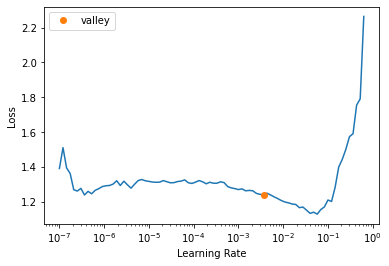

In [22]:
learn2 = cnn_learner(dls_sub20, resnet34, metrics=recall); learn2.lr_find()

In [31]:
learn2.fine_tune(8, 0.00363078061491251)

epoch,train_loss,valid_loss,recall_score,time
0,0.916976,0.483132,0.019231,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.482317,1.510711,0.711538,00:57
1,0.469431,1.071635,0.000000,00:57
2,0.451611,3.694925,0.000000,00:57
3,0.381922,31.264744,1.000000,00:57
4,0.343785,1.364809,0.000000,00:57
5,0.306182,1.390151,0.000000,00:57
6,0.230633,0.508328,0.000000,00:57
7,0.160868,0.417101,0.057692,00:57


# modeling - 30 frames

SuggestedLRs(valley=0.0030199517495930195)

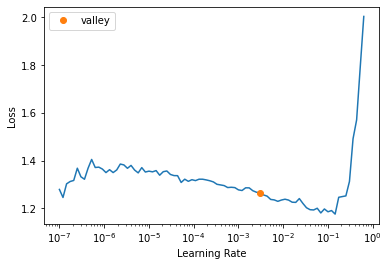

In [23]:
learn3 = cnn_learner(dls_sub30, resnet34, metrics=recall); learn3.lr_find()

In [38]:
learn3.fine_tune(8, 0.0030199517495930195)

epoch,train_loss,valid_loss,recall_score,time
0,0.924352,0.813862,0.395833,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.530254,0.624619,0.000000,00:58
1,0.488564,2.274990,0.000000,00:57
2,0.452188,1.950757,0.854167,00:57
3,0.365567,0.557754,0.000000,00:57
4,0.304952,0.374181,0.000000,00:57
5,0.182241,0.393405,0.083333,00:57
6,0.096976,0.447274,0.020833,00:57
7,0.052981,0.435502,0.020833,00:57


# modeling - 40 frames

SuggestedLRs(valley=0.0030199517495930195)

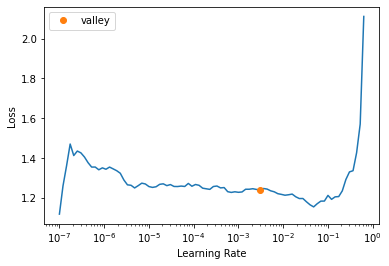

In [24]:
learn4 = cnn_learner(dls_sub40, resnet34, metrics=recall); learn4.lr_find()

In [32]:
learn4.fine_tune(8, 0.0030199517495930195)

epoch,train_loss,valid_loss,recall_score,time
0,0.970701,0.434191,0.075472,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.484653,0.443704,0.000000,00:57
1,0.457685,0.922770,0.000000,00:57
2,0.440420,1.037000,0.000000,00:57
3,0.375402,0.383987,0.000000,00:57
4,0.315082,1.304891,0.000000,00:57
5,0.205033,0.533071,0.037736,00:57
6,0.105674,0.465965,0.037736,00:57
7,0.059026,0.455687,0.037736,00:57


# modeling - 50 frames

SuggestedLRs(valley=0.002511886414140463)

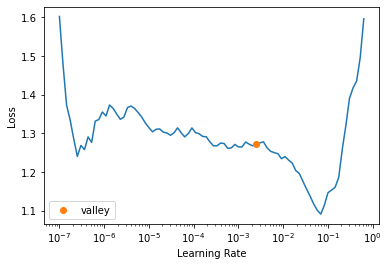

In [25]:
learn5 = cnn_learner(dls_sub50, resnet34, metrics=recall); learn5.lr_find()

In [33]:
learn5.fine_tune(8, 0.002511886414140463)

epoch,train_loss,valid_loss,recall_score,time
0,0.973780,0.549259,0.192308,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.528068,0.393516,0.019231,00:57
1,0.471959,0.393365,0.038462,00:57
2,0.423762,0.513902,0.173077,00:57
3,0.365474,1.177921,0.000000,00:57
4,0.265876,0.755983,0.000000,00:57
5,0.141352,0.493235,0.019231,00:57
6,0.069725,0.421649,0.076923,00:57
7,0.039675,0.424458,0.038462,00:57


# modeling - 60 frames

SuggestedLRs(valley=0.00363078061491251)

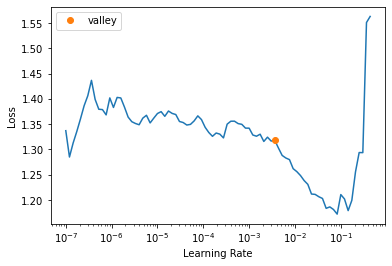

In [26]:
learn6 = cnn_learner(dls_sub60, resnet34, metrics=recall); learn6.lr_find()

In [34]:
learn6.fine_tune(8, 0.00363078061491251)

epoch,train_loss,valid_loss,recall_score,time
0,0.933989,0.625671,0.300000,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.499331,1.037750,0.000000,00:57
1,0.448064,0.365561,0.040000,00:57
2,0.392381,1.581927,0.860000,00:57
3,0.332616,0.479460,0.000000,00:57
4,0.269624,0.622436,0.000000,00:57
5,0.157667,0.532463,0.120000,00:57
6,0.068785,0.482921,0.020000,00:57
7,0.032158,0.501151,0.020000,00:57


# modeling - 70 frames

SuggestedLRs(valley=0.00363078061491251)

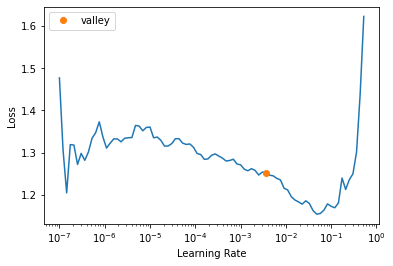

In [27]:
learn7 = cnn_learner(dls_sub70, resnet34, metrics=recall); learn7.lr_find()

In [35]:
learn7.fine_tune(8, 0.00363078061491251)

epoch,train_loss,valid_loss,recall_score,time
0,0.889540,0.390507,0.058824,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.455032,0.569991,0.000000,00:57
1,0.451571,0.533909,0.000000,00:57
2,0.380906,0.419184,0.117647,00:57
3,0.332471,0.870255,0.000000,00:57
4,0.241191,0.641085,0.000000,00:57
5,0.122088,0.432848,0.058824,00:57
6,0.055990,0.455976,0.058824,00:57
7,0.026323,0.457621,0.058824,00:57


# modeling - 80 frames

SuggestedLRs(valley=0.0030199517495930195)

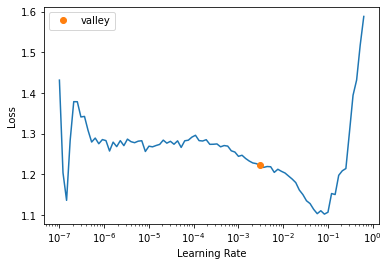

In [28]:
learn8 = cnn_learner(dls_sub80, resnet34, metrics=recall); learn8.lr_find()

In [36]:
learn8.fine_tune(8, 0.0030199517495930195)

epoch,train_loss,valid_loss,recall_score,time
0,0.886522,0.668409,0.163934,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.492512,0.785277,0.475410,00:57
1,0.448847,1.221384,0.000000,00:57
2,0.421166,1.187254,0.000000,00:57
3,0.338682,0.483650,0.131148,00:57
4,0.278666,0.626984,0.016393,00:57
5,0.173825,0.547970,0.213115,00:57
6,0.093124,0.523403,0.065574,00:58
7,0.050212,0.540612,0.081967,00:57


# modeling - 90 frames

SuggestedLRs(valley=0.002511886414140463)

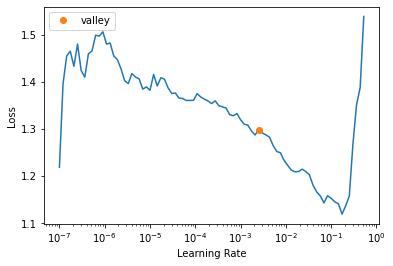

In [29]:
learn9 = cnn_learner(dls_sub90, resnet34, metrics=recall); learn9.lr_find()

In [37]:
learn9.fine_tune(12, 0.002511886414140463)

epoch,train_loss,valid_loss,recall_score,time
0,0.892334,0.557405,0.030769,00:45


epoch,train_loss,valid_loss,recall_score,time
0,0.538516,1.973047,0.753846,00:57
1,0.436761,0.944162,0.000000,00:57
2,0.393716,0.629659,0.230769,00:57
3,0.363286,2.134692,0.707692,00:58
4,0.266510,0.489652,0.123077,00:57
5,0.176441,1.028036,0.015385,00:57
6,0.100517,0.666255,0.184615,00:58
7,0.054752,0.648189,0.046154,00:57
8,0.030174,0.630118,0.107692,00:57
9,0.015949,0.788458,0.046154,00:57
